<h1>ДЗ2 Numpy Иванов Даниил Вариант 6</h1>

<h1> Импорты <h1>

In [285]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Задание 1

На маркетплейсе есть огромный объем данных содержащий записи о продажах различных продуктов. Наша цель — рассчитать общий доход, полученный от каждого продукта за определённый период.

Необходимо решить задачу через классический python, numpy и numpy с использованием векторизации


Данные:
products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны'] (при решении через numpy необходимо представить это в виде np.array() )
prices = [20000, 3000, 45600, 5000] (при решении через numpy необходимо представить это в виде np.array() )

Данные о продажах необходимо сгенерировать самостоятельно и вывести в одном параграфов в ноутбуке, ниже приведен пример генерации случайных значений

In [5]:
# пример генерации на python

import random
prices = [20000, 3000, 45600, 5000]
products = products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']
variant = 6 # подставьте номер своего  варианта

[382080000, 57882000, 912501600, 102810000]


<h1>Генерируем данные для 3 алгоритмов</h1>

In [104]:
# генерим данные
sales = [random.randint(0, 100+variant) for i in range(1000000)]
sales[:3]

[0, 95, 19]

In [108]:
# данные для np
sales_np = np.array(sales).reshape(250000,4)
sales_np

array([[  0,  95,  19,  23],
       [ 92,  16,  72,  54],
       [ 48,  79,  73,  13],
       ...,
       [ 87, 101,  67,  49],
       [ 57,  73,  39,  10],
       [ 14,  39,  17, 100]])

<h1>Классический Python</h1>


In [86]:
%%time

# реализация на классическом python
total_revenue = [0,0,0,0]

for i in range(0, len(sales), 4):
  for j in range(len(total_revenue)):
    revenue_per_current_item = sales[i+j]*prices[j]
    total_revenue[j] += revenue_per_current_item

print(total_revenue)


[265562780000, 39750702000, 604058001600, 66204935000]
CPU times: user 428 ms, sys: 1.3 ms, total: 430 ms
Wall time: 432 ms


<h1>Numpy с векторизацией</h1>


In [286]:
%%time
sales_np = np.array(sales).reshape(250000,4)
total_revenue = sum(sales_np*prices)

print(total_revenue)

[265397020000  39766713000 603563697600  66205805000]
CPU times: user 239 ms, sys: 1.96 ms, total: 241 ms
Wall time: 241 ms


<h1>Numpy без векторизации</h1>


In [287]:
%%time
sales_np = sales_np.reshape(1, 1000000)
total_revenue_np = np.array([0,0,0,0])
prices_np = np.array(prices)

cars_sold = sales_np[0][0::4] * prices_np[0]
boots_sold = sales_np[0][1::4] * prices_np[1]
clothes_sold = sales_np[0][2::4] * prices_np[2]
phones_sold = sales_np[0][3::4] * prices_np[3]

total_revenue = [sum(cars_sold), sum(boots_sold), sum(clothes_sold), sum(phones_sold)]

print(total_revenue)



[265397020000, 39766713000, 603563697600, 66205805000]
CPU times: user 100 ms, sys: 1.92 ms, total: 102 ms
Wall time: 106 ms


<h1>Выводы из временных данных</h1>






С учётом выполнения алгоритмов на одинаковых датасетах (генерация данных осуществлялась предварительно)

- Среднее время выполнение кода на классическом Python составляет около 400 мс
- Среднее время выполнения кода на numpy без векторизации - 100 мс
- Среднее время выполнения кода на numpy с векторизацией - 250 мс


# Задание 2

Необходимо написать с использованием numpy реализацию одного из следующих алгоритмов:

- heapsort (вариант: 1,5,9,13,17,21)

- mergesort (вариант: 2,6,10,14,18,22)

- stable (вариант: 3,7,11,15,19)

- quicksort (вариант: 4,8,12,16,20)

Сравнить скорость выполнения этих алгоритмов на чистом python, вашей реализации и numpy.sort()

<h1>Реализации mergesort на чистом Python</h1>

In [362]:
data = [random.randint(0, 100+variant) for i in range(1000000)]

In [328]:
def mergesort(data):
    if len(data) > 1:
        mid = len(data) // 2
        left = data[:mid]
        right = data[mid:]

        mergesort(left)
        mergesort(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
              data[k] = left[i]
              i += 1
            else:
                data[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            data[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            data[k]=right[j]
            j += 1
            k += 1

In [363]:
%%time
x = mergesort(data)

None
CPU times: user 6.64 s, sys: 13.7 ms, total: 6.66 s
Wall time: 6.68 s


<h1> Реализация mergesort на numpy

In [330]:
data_np = np.array(data)

In [331]:
def numpy_mergesort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half, right_half = arr[:mid], arr[mid:]

    left_sorted = numpy_mergesort(left_half)
    right_sorted = numpy_mergesort(right_half)

    return merge_np(left_sorted, right_sorted)


In [332]:
def merge_np(left, right):
    result = np.empty(len(left) + len(right), dtype=left.dtype)
    i, j, k = 0, 0, 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result[k] = left[i]
            i += 1
        else:
            result[k] = right[j]
            j += 1
        k += 1

    result[k:k+len(left)-i] = left[i:]
    result[k+len(left)-i:] = right[j:]

    return result

In [341]:
%%time
x = numpy_mergesort(data_np)

CPU times: user 12 s, sys: 129 ms, total: 12.1 s
Wall time: 12.1 s


<h1>Использование встроенной сортировки np.sort() </h1>

In [334]:
%%time
x = np.sort(data_np)

CPU times: user 23.8 ms, sys: 4.02 ms, total: 27.8 ms
Wall time: 28 ms


<h1> Выводы из временных данных </h1>

С учётом выполнения алгоритмов на одинаковых датасетах (генерация данных осуществлялась предварительно - 1_000_000 значений)
- Реализация алгоритма mergesort на классическом Python - 7s.
- Реализация алгоритма merge sort с использованием Numpy - 12s
- Использование встроенной сортировки np.sort() - 28ms

# Задание 3

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Давайте представим эти данные в виде структурированных массивов и определим, где же люди пьют больше вина, пива и других спиртных напитков.

<h1> Представим исходные данные в виде структурированного массива </h1>

In [366]:
dtype = [('country', '<U30'), ('beer_servings', '<i4'), ('spirit_servings', '<i4'), ('wine_servings', '<i4'), ('total_litres_of_pure_alcohol', '<f4')]
data = np.genfromtxt('drinks.csv', delimiter=',', skip_header=1, dtype=dtype)

<h1>Определим, где пьют больше вина, пива и других спиртных напитков</h1>

In [ ]:
print("beer_servings - " , data[data["beer_servings"] == max(data["beer_servings"])]["country"][0])
print("spirit_servings - ", data[data["spirit_servings"] == max(data["spirit_servings"])]["country"][0])
print("wine_servings - " , data[data["wine_servings"] == max(data["wine_servings"])]["country"][0])
print("Наибольшее потребление алкоголя в -", data[data["total_litres_of_pure_alcohol"] == max(data["total_litres_of_pure_alcohol"])]["country"][0])

#Задание 4

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде структурированных массивов и определим:

- число проклятий, летальных исходов и их отношение по фильмам

- частота употребления конкретных прокрятий

- распределение времени между проклятиями

In [278]:
def get_count_of_words_and_deaths_per_movie (title, data):

  """ Функция для вывода количества проклятий и смертей по конкретному фильму"""

  print('В фильме ' + title + ' ' + str(len(data[np.logical_and(data['type'] == 'word', data['movie'] == title)])) + ' проклятий')
  print('В фильме ' + title + ' ' + str(len(data[np.logical_and(data['type'] == 'death', data['movie'] == title)])) + ' летальных исходов')

<h1> Представим исходные данные в виде структурированного массива

In [352]:
dtype = [('movie', 'U50'), ('type', 'U50'), ('word', 'U50'), ('minutes_in', 'f4')]
data = np.genfromtxt('tarantino.csv', delimiter=',', skip_header=1, dtype=dtype)

<h1>Число проклятий и летальных исходов </h1>

In [353]:
print("Число проклятий - ", len(data[data['type'] == 'word']))
print("Число летальных исходов - ", len(data[data['type'] == 'death']))

Число проклятий -  1704
Число летальных исходов -  190


<h1> Отношение проклятий и летальных исходов по фильмам <h1>

In [354]:
titles = np.unique(data['movie'])

for i in range(len(titles)):
  get_count_of_words_and_deaths_per_movie(titles[i], data)

В фильме Django Unchained 262 проклятий
В фильме Django Unchained 47 летальных исходов
В фильме Inglorious Basterds 58 проклятий
В фильме Inglorious Basterds 48 летальных исходов
В фильме Jackie Brown 368 проклятий
В фильме Jackie Brown 4 летальных исходов
В фильме Kill Bill: Vol. 1 57 проклятий
В фильме Kill Bill: Vol. 1 63 летальных исходов
В фильме Kill Bill: Vol. 2 69 проклятий
В фильме Kill Bill: Vol. 2 11 летальных исходов
В фильме Pulp Fiction 469 проклятий
В фильме Pulp Fiction 7 летальных исходов
В фильме Reservoir Dogs 421 проклятий
В фильме Reservoir Dogs 10 летальных исходов


<h1>Частота употребления конкретных проклятий</h1>

In [ ]:
words = np.unique(data['word'])
words = words[1:]
for i in range(len(words)):
  print("Слово " + words[i] + " употребляется "  + str(len(data[data['word'] == words[i]])) + " раз")

<h1>Распределение времени между проклятиями</h1>

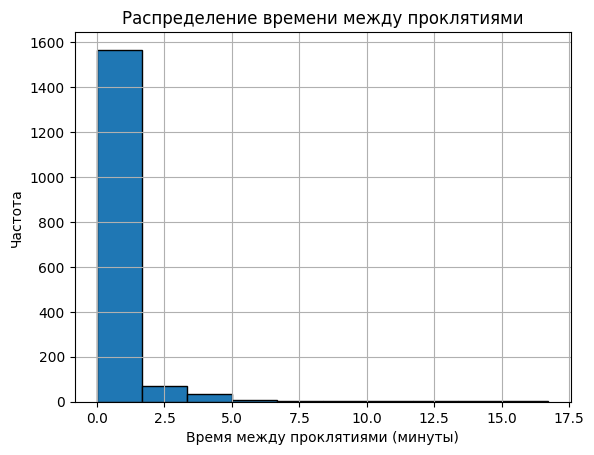

In [357]:
profane_events = data[data['type'] == 'word']['minutes_in']
time_intervals = np.diff(profane_events)
time_intervals = time_intervals[time_intervals >= 0]

plt.hist(time_intervals, bins=10, edgecolor='k')
plt.title("Распределение времени между проклятиями")
plt.xlabel("Время между проклятиями (минуты)")
plt.ylabel("Частота")
plt.grid(True)

plt.show()